In [1]:
import pandas as pd
df = pd.read_csv("analisis_frontal_hand_svm_pyfeat.csv")

missing_before = df["dominant_emotion_before"].isna().sum()
missing_after = df["dominant_emotion_after"].isna().sum()
print(f"Gagal deteksi before: {missing_before}")
print(f"Gagal deteksi after: {missing_after}")

correct_before = (df["gt"] == df["dominant_emotion_before"]).sum()
correct_after = (df["gt"] == df["dominant_emotion_after"]).sum()
print("\n")
print("Correct before:", correct_before)
print("Correct after:", correct_after)

accuracy_before = (df["gt"] == df["dominant_emotion_before"]).mean() * 100
accuracy_after = (df["gt"] == df["dominant_emotion_after"]).mean() * 100
print("\n")
print(f"Akurasi before: {accuracy_before:.2f}%")
print(f"Akurasi after: {accuracy_after:.2f}%")

accuracy_per_class_before = ((df["gt"] == df["dominant_emotion_before"]).groupby(df["gt"]).mean() * 100)
accuracy_per_class_after = ((df["gt"] == df["dominant_emotion_after"]).groupby(df["gt"]).mean() * 100)
print("\n")
print("Akurasi per emosi (before):")
print(accuracy_per_class_before)
print("\n")
print("Akurasi per emosi (after):")
print(accuracy_per_class_after)


Gagal deteksi before: 33
Gagal deteksi after: 7


Correct before: 284
Correct after: 367


Akurasi before: 27.05%
Akurasi after: 34.95%


Akurasi per emosi (before):
gt
angry       77.333333
disgust      1.333333
fear        57.333333
happy       30.666667
neutral      6.666667
sad         12.666667
surprise     3.333333
dtype: float64


Akurasi per emosi (after):
gt
angry       67.333333
disgust      1.333333
fear        58.666667
happy       74.666667
neutral      8.000000
sad         34.000000
surprise     0.666667
dtype: float64


<Figure size 1000x600 with 0 Axes>

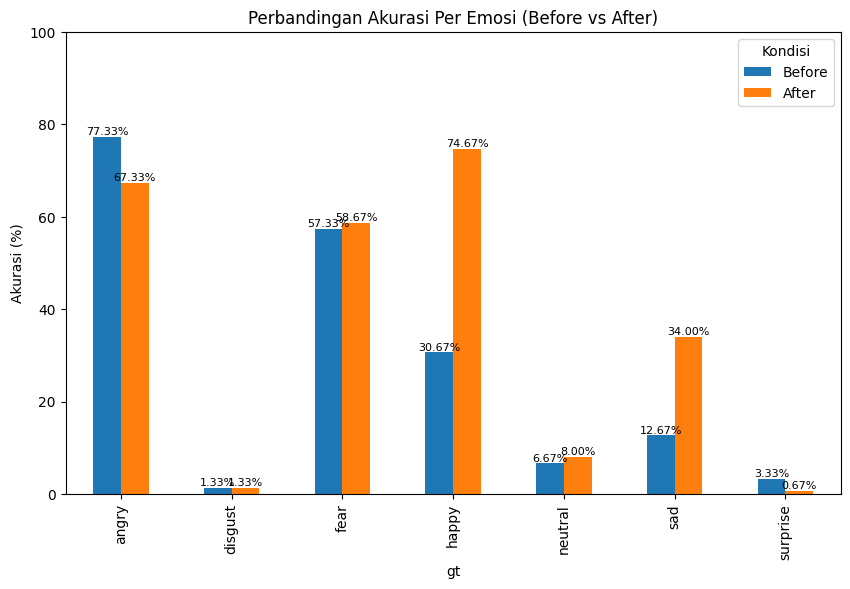

In [2]:
import matplotlib.pyplot as plt

accuracy_df = pd.DataFrame({
    "Before": accuracy_per_class_before,
    "After": accuracy_per_class_after
})

plt.figure(figsize=(10,6))
accuracy_df.plot(kind="bar", figsize=(10,6))

plt.ylabel("Akurasi (%)")
plt.title("Perbandingan Akurasi Per Emosi (Before vs After)")
plt.ylim(0, 100)
plt.legend(title="Kondisi")

for p in plt.gca().patches:
    plt.gca().annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom", fontsize=8, rotation=0
    )

plt.show()
